## Preliminary sampler results

In the notebook we remove 1 out of the 200 small box, $N=256^3$ particle simulations and treat this simulation as a mock dataset for which we know the truth. We then train the Gaussian process emulator on the remaining simulations and see how well the sampler can recover the true parameters.

In order to keep the test as clean as possible, for now we do not vary the redshift evolution of the emulator parameters, and instead sampler over a uniform rescaling of each parameter at each redshift, so the true value for each likelihood parameter here is 1.

NB that some of these chains are not fully converged, I was using GR convergence until I found out that it is not a good test for `emcee` chains as they are not independent. We will switch to using the autocorrelation time for future tests.

In [1]:
import numpy as np
import emcee_sampler
from chainconsumer import ChainConsumer

In [2]:
sampler_z_full = emcee_sampler.EmceeSampler(read_chain_file=2)
sampler_single_full = emcee_sampler.EmceeSampler(read_chain_file=3)

Loading emulator using a specific arxiv, not the one set in basedir


 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


In [3]:
chain_z_full,lnprob_z_full=sampler_z_full.get_chain(cube=False)
chain_single_full,lnprob_single_full=sampler_single_full.get_chain(cube=False)

### Multiple GPs vs a single GP

Comparison of training an independent GP on each redshift bin (blue) vs one single GP for all points (green)

 /home/chris/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning:Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


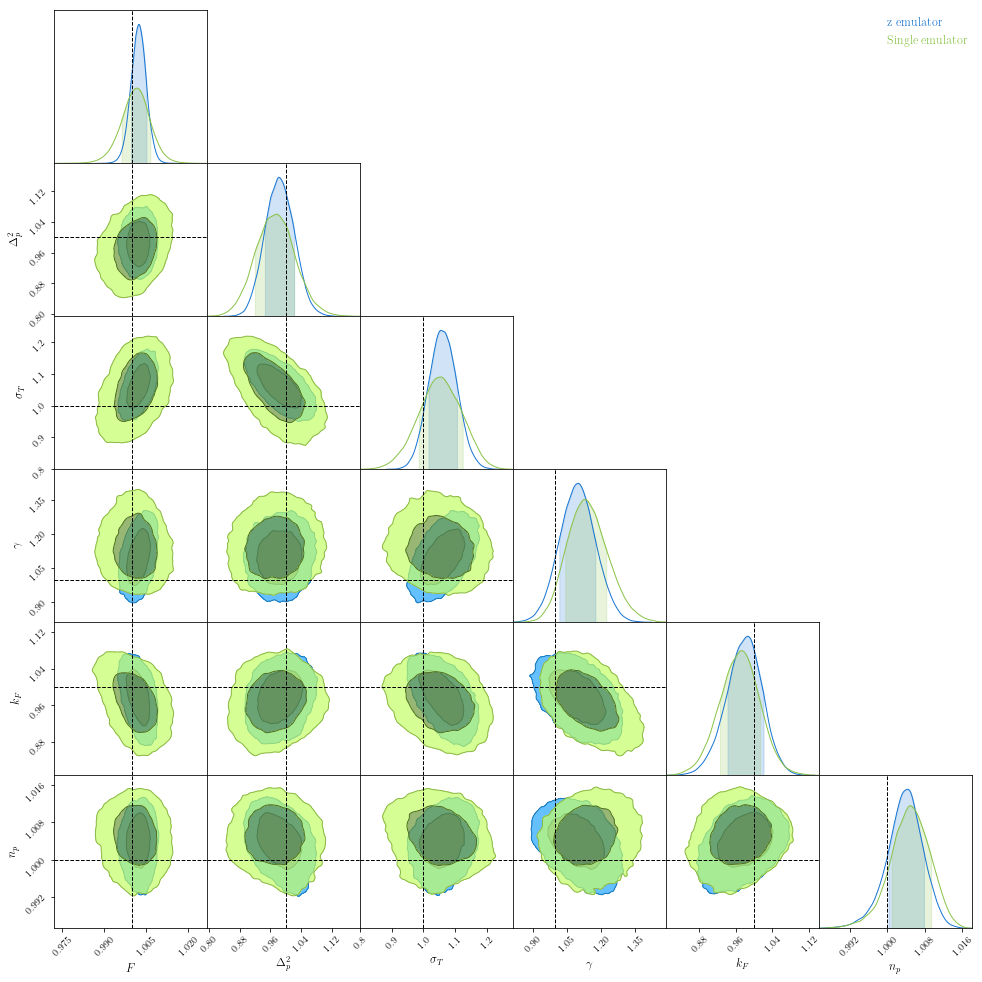

In [4]:
c=ChainConsumer()
c.add_chain(chain_z_full,parameters=sampler_z_full.paramstrings,name="z emulator")
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="Single emulator")
fig = c.plotter.plot(figsize=(15,15),truth=sampler_z_full.truth)
fig.show()

In [5]:
sampler_z_100 = emcee_sampler.EmceeSampler(read_chain_file=4)
chain_z_100,lnprob_z_100=sampler_z_100.get_chain(cube=False)

Loading emulator using a specific arxiv, not the one set in basedir


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
 /home/chris/.local/lib/python3.5/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


In [6]:
sampler_z_50 = emcee_sampler.EmceeSampler(read_chain_file=5)
chain_z_50,lnprob_z_50=sampler_z_50.get_chain(cube=False)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Loading emulator using a specific arxiv, not the one set in basedir


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


### Undersampling simulation suite

Using an emulator for each redshift, we reduce the number of sims included in the training set to 100 and then 50 to see how the contours degrade. From this plot it appears that 200 simulations is overkill

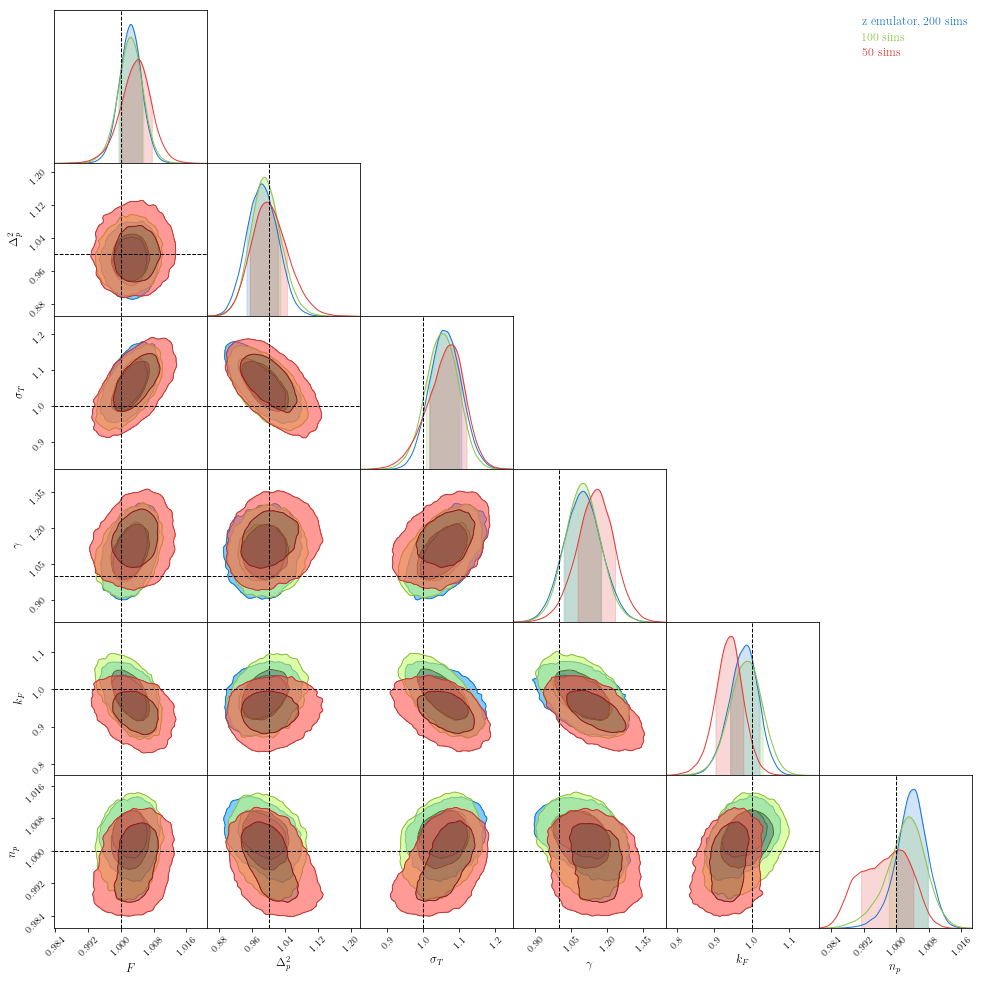

In [7]:
c=ChainConsumer()
c.add_chain(chain_z_full,parameters=sampler_z_full.paramstrings,name="z emulator, 200 sims")
c.add_chain(chain_z_100,parameters=sampler_z_100.paramstrings,name="100 sims")
c.add_chain(chain_z_50,parameters=sampler_z_50.paramstrings,name="50 sims")
fig = c.plotter.plot(figsize=(15,15),truth=sampler_z_full.truth)
fig.show()

In [8]:
sampler_single_100 = emcee_sampler.EmceeSampler(read_chain_file=6)
chain_single_100,lnprob_full_100=sampler_single_100.get_chain(cube=False)
sampler_single_50=emcee_sampler.EmceeSampler(read_chain_file=7)
chain_single_50,lnprob_full_50=sampler_single_50.get_chain(cube=False)

INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


Same plot as before except with one single GP emulator

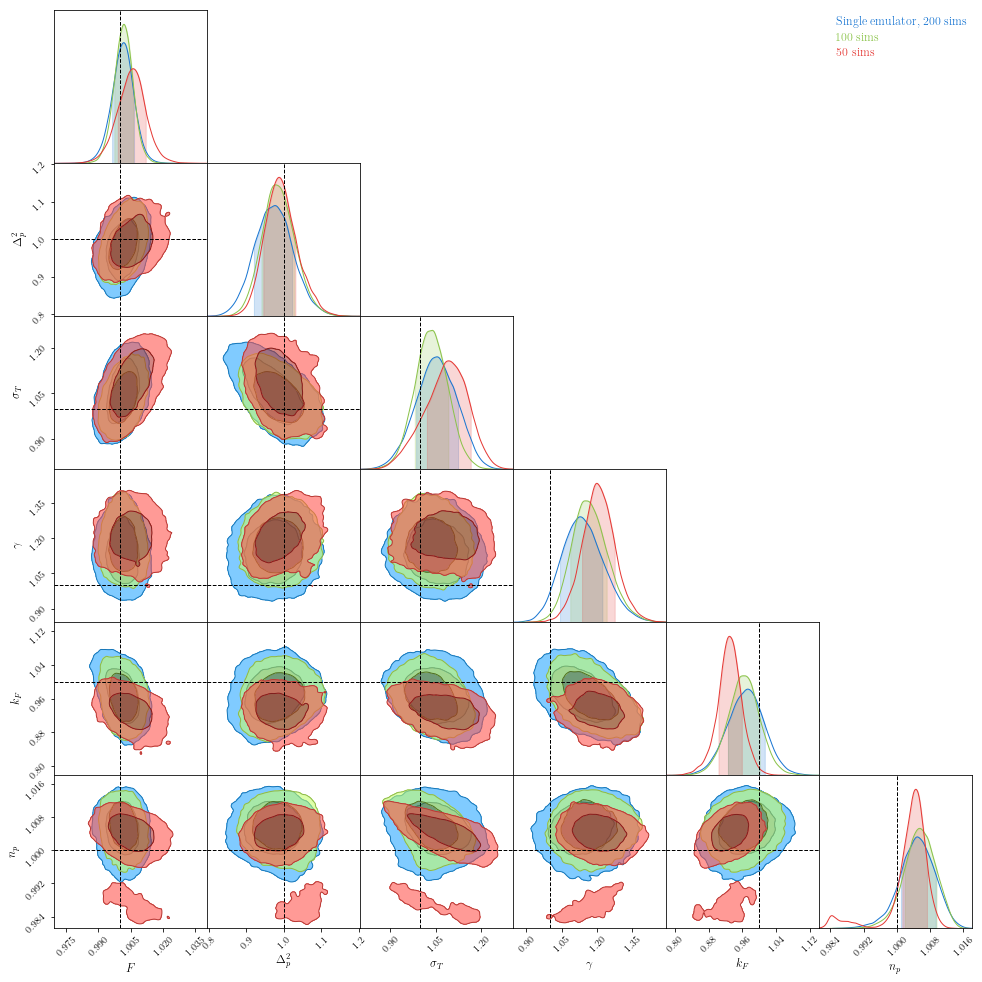

In [9]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="Single emulator, 200 sims")
c.add_chain(chain_single_100,parameters=sampler_single_100.paramstrings,name="100 sims")
c.add_chain(chain_single_50,parameters=sampler_single_50.paramstrings,name="50 sims")
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.show()

In [10]:
sampler_z_neartau=emcee_sampler.EmceeSampler(read_chain_file=8)
chain_z_neartau,lnprob_z_neartau=sampler_z_neartau.get_chain(cube=False)

Loading emulator using a specific arxiv, not the one set in basedir


INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters
INFO:GP:initializing Y
INFO:GP:initializing inference method
INFO:GP:adding kernel and likelihood as parameters


Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Chain shape is  (200000, 6)


### Nearest $<F>$ rescaling

In blue we show again results for an independent GP at each redshift, and in green we show the effect of including the nearest $<F>$ rescaling in the training data.

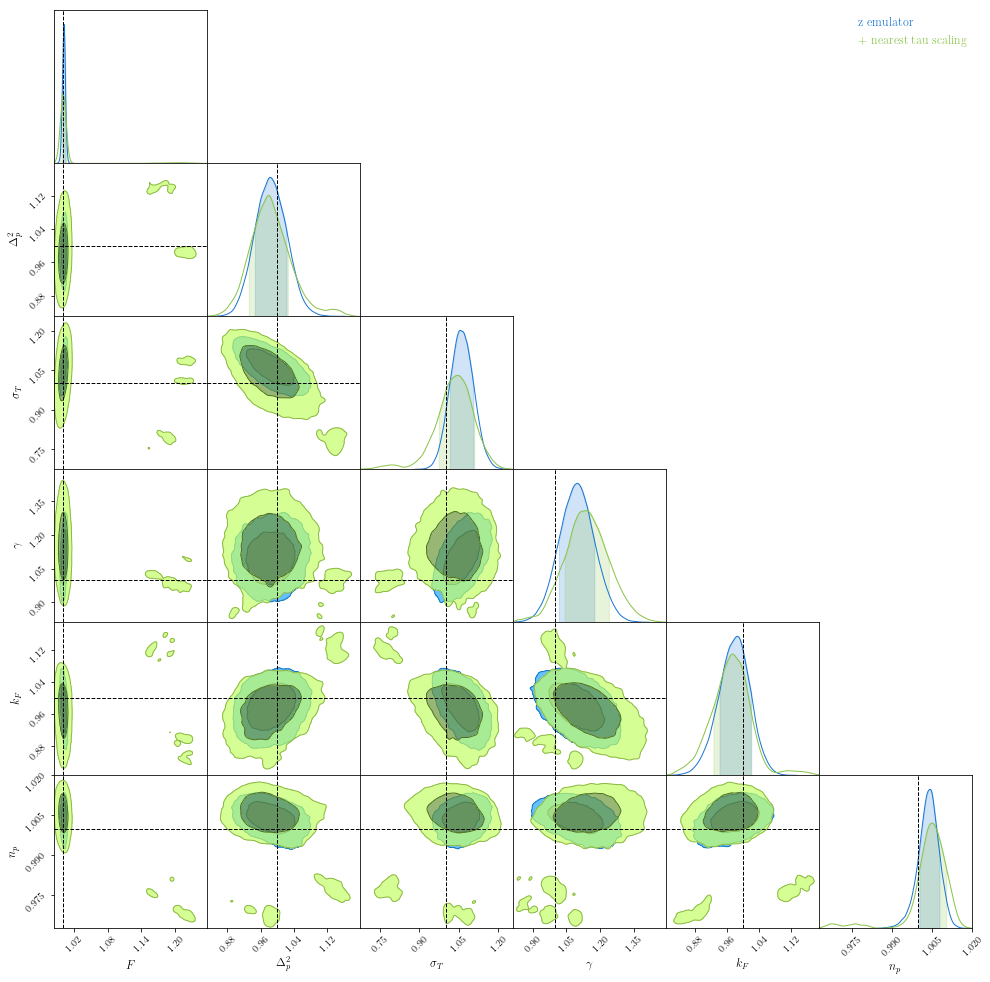

In [11]:
c=ChainConsumer()
c.add_chain(chain_z_full,parameters=sampler_z_full.paramstrings,name="z emulator")
c.add_chain(chain_z_neartau,parameters=sampler_z_neartau.paramstrings,name="+ nearest tau scaling")
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.show()

In [ ]:
sampler_single_neartau=emcee_sampler.EmceeSampler(read_chain_file=9)
chain_single_neartau,lnprob_single_neartau=sampler_single_neartau.get_chain(cube=False)

In [ ]:
c=ChainConsumer()
c.add_chain(chain_single_full,parameters=sampler_single_full.paramstrings,name="single emulator")
c.add_chain(chain_single_neartau,parameters=sampler_single_neartau.paramstrings,name="+ nearest tau scaling")
fig = c.plotter.plot(figsize=(15,15),truth=sampler_single_full.truth)
fig.show()